# Take a look a counts for one sample

In [8]:
# Imports
import os
import numpy as np
from scipy.io import mmread
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

In [24]:
# Load the dataset
adata = sc.read_10x_h5(
    "/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_scRNA-seq/processed/25Oct23/cellbender/H1-D32/cellbender_raw_feature_bc_matrix_filtered.h5"
)
adata.var_names_make_unique()
adata

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 5074 × 36601
    var: 'gene_ids', 'feature_types', 'genome'

In [25]:
# QC calc
adata.var["mt"] = adata.var_names.str.startswith("MT-")
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
sc.pp.calculate_qc_metrics(
    adata,
    qc_vars=["mt", "ribo"],
    inplace=True,
    percent_top=[20],
    log1p=True,
)

In [26]:
def rna_qc_triplet_plot(
    adata,
    total_counts_bins: int = 100,
):
    with plt.rc_context():
        sns.displot(adata.obs["total_counts"], bins=total_counts_bins, kde=False)
        sc.pl.violin(adata, "pct_counts_mt")
        sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [27]:
# What is the top 1% of total counts?
adata.obs["total_counts"].quantile(0.99)

77732.94999999991

H1-D11 top 1%: ~60055<br>
H1-D14 top 1%: ~45622<br>
H1-D21 top 1%: ~87649<br>
H1-D32 top 1%: ~77732<br>
H1-D39 top 1%: ~42037<br>

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:842: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


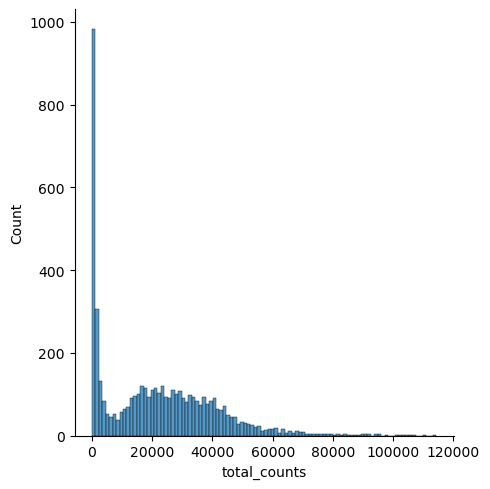

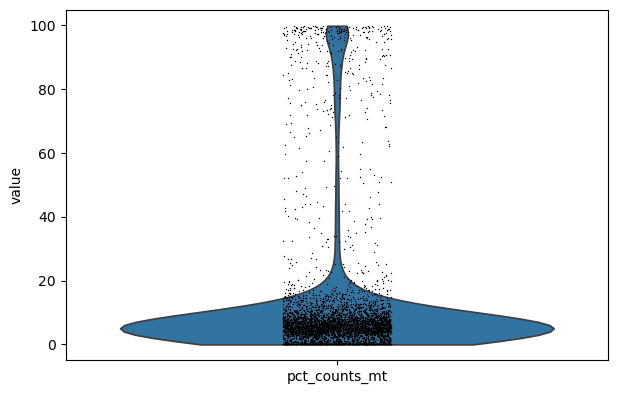

/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:315: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(adata.obs[key]):
/cellar/users/aklie/opt/miniconda3/envs/scverse-py39-R431/lib/python3.9/site-packages/scanpy/plotting/_utils.py:714: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]


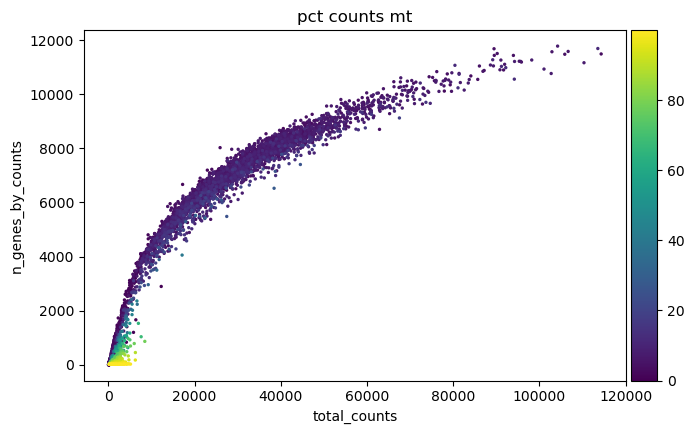

In [29]:
rna_qc_triplet_plot(adata)

# DONE!

---